In [1]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
all_data = []
image_chop = 50

for i in range(0,7):
    pkl_file = open(f'../data/cat{i}.pkl', 'rb')
    data = pickle.load(pkl_file)
    data = data.reshape(int(data.shape[0] * image_chop), int(data.shape[1] / image_chop), 3)
    print(data.shape)
    pkl_file.close()
    all_data.append(data)

(83750, 1800, 3)
(80000, 1800, 3)
(86350, 1800, 3)
(39700, 1800, 3)
(68600, 1800, 3)
(65150, 1800, 3)
(68100, 1800, 3)


In [3]:
print(len(all_data))
samples = 0
for i in range(0,7):
    print(all_data[i].shape)
    samples += all_data[i].shape[0]
print(f'Sample size: {samples}')

7
(83750, 1800, 3)
(80000, 1800, 3)
(86350, 1800, 3)
(39700, 1800, 3)
(68600, 1800, 3)
(65150, 1800, 3)
(68100, 1800, 3)
Sample size: 491650


In [4]:
device = torch.device('cuda:0')

In [5]:
# params
D_in = all_data[1].shape[1]
H1 = int(all_data[1].shape[1]*0.75)
D_out = int(all_data[1].shape[1] / 2)

learning_rate = 0.0001
batch_size = image_chop * 10
epochs = 1000

# Regularisierung
weight_decay=0.005

In [6]:
# Neural Network
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        
        self.encoder = torch.nn.Sequential(
            nn.Linear(D_in, H1),
            nn.ReLU(),
            nn.Linear(H1, D_out)
        )

        self.decoder = torch.nn.Sequential(
            nn.Linear(D_out, H1),
            nn.ReLU(),
            nn.Linear(H1, D_in),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
model = autoencoder()
model.cuda()

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1800, out_features=1350, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1350, out_features=900, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=900, out_features=1350, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1350, out_features=1800, bias=True)
    (3): Sigmoid()
  )
)

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.MSELoss()

In [9]:
# Train
loss_hist = []

for t in range(epochs):
    for bulk in range(len(all_data)):
        x = torch.tensor(all_data[bulk], dtype=torch.float32, device=device)
        for batch in range(0, int(x.shape[0]/batch_size)):
            
            # Berechne den Batch
            batch_x = x[batch * batch_size : (batch + 1) * batch_size, :].transpose(1, 2)
        
            # Berechne die Vorhersage (foward step)
            outputs = model.forward(batch_x)

            # Berechne den Fehler
            loss = criterion(outputs, batch_x)
        
            # Berechne die Gradienten und Aktualisiere die Gewichte (backward step)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
    # Berechne den Fehler (Ausgabe des Fehlers alle x Iterationen)
    if t % 2 == 0:
        loss_hist.append(loss.item())
        print(t, f"Train loss: {loss.item()}")

0 Train loss: 0.0561690516769886
2 Train loss: 0.05594406649470329
4 Train loss: 0.05597377195954323
6 Train loss: 0.0559353344142437
8 Train loss: 0.05590115115046501
10 Train loss: 0.055870745331048965
12 Train loss: 0.05584243685007095
14 Train loss: 0.055809520184993744
16 Train loss: 0.05577174946665764
18 Train loss: 0.05574220046401024
20 Train loss: 0.055721789598464966
22 Train loss: 0.05570690333843231
24 Train loss: 0.05569472163915634
26 Train loss: 0.05568545311689377
28 Train loss: 0.05567675828933716
30 Train loss: 0.055668704211711884
32 Train loss: 0.05566300451755524
34 Train loss: 0.05565869063138962
36 Train loss: 0.05565539747476578
38 Train loss: 0.05565216392278671
40 Train loss: 0.05564982071518898
42 Train loss: 0.05564814805984497
44 Train loss: 0.055646661669015884
46 Train loss: 0.05564500764012337
48 Train loss: 0.05564340204000473
50 Train loss: 0.055642176419496536
52 Train loss: 0.0556403249502182
54 Train loss: 0.055637892335653305
56 Train loss: 0.0556

456 Train loss: 0.05557950213551521
458 Train loss: 0.05557940527796745
460 Train loss: 0.05557934194803238
462 Train loss: 0.05557901784777641
464 Train loss: 0.055579084903001785
466 Train loss: 0.05557894706726074
468 Train loss: 0.05557872727513313
470 Train loss: 0.055578604340553284
472 Train loss: 0.055578552186489105
474 Train loss: 0.055578406900167465
476 Train loss: 0.055578142404556274
478 Train loss: 0.05557797849178314
480 Train loss: 0.055577777326107025
482 Train loss: 0.0555775985121727
484 Train loss: 0.05557756870985031
486 Train loss: 0.05557743459939957
488 Train loss: 0.05557723343372345
490 Train loss: 0.05557680130004883
492 Train loss: 0.05557652935385704
494 Train loss: 0.055576346814632416
496 Train loss: 0.055575892329216
498 Train loss: 0.05557554215192795
500 Train loss: 0.05557519197463989
502 Train loss: 0.05557458847761154
504 Train loss: 0.05557425320148468
506 Train loss: 0.055574700236320496
508 Train loss: 0.055574480444192886
510 Train loss: 0.0555

908 Train loss: 0.05557377263903618
910 Train loss: 0.0555737279355526
912 Train loss: 0.055573634803295135
914 Train loss: 0.055574025958776474
916 Train loss: 0.05557384341955185
918 Train loss: 0.05557360127568245
920 Train loss: 0.05557383596897125
922 Train loss: 0.055573612451553345
924 Train loss: 0.0555737279355526
926 Train loss: 0.05557362362742424
928 Train loss: 0.055573634803295135
930 Train loss: 0.05557357519865036
932 Train loss: 0.055573832243680954
934 Train loss: 0.055573638528585434
936 Train loss: 0.05557383596897125
938 Train loss: 0.05557360127568245
940 Train loss: 0.0555734820663929
942 Train loss: 0.05557366833090782
944 Train loss: 0.05557365342974663
946 Train loss: 0.05557354912161827
948 Train loss: 0.055573783814907074
950 Train loss: 0.05557360500097275
952 Train loss: 0.055573560297489166
954 Train loss: 0.05557384341955185
956 Train loss: 0.05557362735271454
958 Train loss: 0.0555737167596817
960 Train loss: 0.05557365342974663
962 Train loss: 0.055573

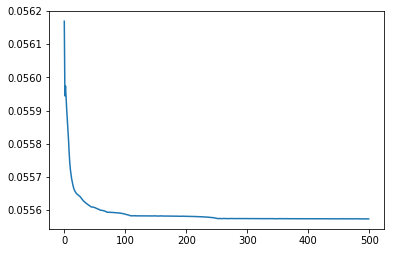

In [10]:
plt.plot(loss_hist)

In [11]:
torch.save(model.cpu(), '../data/models/ae_x2_sigmoid.pt')

/home/alex/.local/lib/python3.7/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
